# DSCI 100 Project: Individual planning stage

**By Angel Chen (71703029) of Group 4 from DSCI 100 – section 008**

In [27]:
library(repr)
library(tidyverse)
options(repr.matrix.max.rows = 4)

The questions:
> Question 1: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?
> 
> Question 2: We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.
> 
> Question 3: We are interested in demand forecasting, namely, what time windows are most likely to have large number of simultaneous players. This is because we need to ensure that the number of licenses on hand is sufficiently large to accommodate all parallel players with high probability. 

Let's first have a look at the data.

In [25]:
players <- read_csv("data/players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


Within the `players` dataset, we can see certain characteristics of each participant who has signed up to PLAICraft.ai. There are 196 observations and 7 variables. The variables are summarized by the following table:

|Variable|Data type|Explanation|
|--------|--------|--------|
|`experience`|character|Player's self-identified Minecraft experience level|
|`subscribe`|logical|Player's subscription to newsletter (true if subscribed)|
|`hashedEmail`|character|Player's email address hidden as a hash|
|`played_hours`|double|Total hours of Minecraft played via the plaicraft.ai server|
|`name`|character|Player's submitted name|
|`gender`|character|Player's self-identified gender|
|`Age`|double|Player's submitted age|

From the get-go, we can see that certain variables' data types aren't optimal. Namely, for categorical variables with a limited selection of values like `experience` and `gender`, the data type should be changed to factor.

In [26]:
players <- players |>
    mutate(
        experience = as_factor(experience),
        gender = as_factor(gender)
    )
players

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


Done! Let's do a summary overview of the data.

In [28]:
summary(players)

    experience subscribe       hashedEmail         played_hours    
 Pro     :14   Mode :logical   Length:196         Min.   :  0.000  
 Veteran :48   FALSE:52        Class :character   1st Qu.:  0.000  
 Amateur :63   TRUE :144       Mode  :character   Median :  0.100  
 Regular :36                                      Mean   :  5.846  
 Beginner:35                                      3rd Qu.:  0.600  
                                                  Max.   :223.100  
                                                                   
     name                         gender         Age       
 Length:196         Male             :124   Min.   : 9.00  
 Class :character   Female           : 37   1st Qu.:17.00  
 Mode  :character   Non-binary       : 15   Median :19.00  
                    Prefer not to say: 11   Mean   :21.14  
                    Agender          :  2   3rd Qu.:22.75  
                    Two-Spirited     :  6   Max.   :58.00  
                    Other           

Concerning the quantitative variables in `players`,

|Variable|Range (min. to max. value)|Median|Mean|
|--------|--------|--------|--------|
|`played_hours`|0.00 to 223.10|0.10|5.85|
|`Age`|9 to 58|19|21.13|

Within the `Age` variable, there are also 2 `NA`'s, which we will need to account for in our downstream data analysis. It is concerning that the median played hours is 0.10, which reveals that half of players who have signed up to PLAICraft.ai have played less than 0.10 hours. As the dataset includes all participants who have signed up but not necessarily played, players who have `played_hours` values of 0 may not be useful to our analysis if we want to answer Questions 2 or 3.

Concerning the non-quantitative variables,
* `experience` Experience levels have the options ranging from Beginner, Amateur, Regular, Veteran, Pro. From reading the blog on PLAICraft.ai, we learn that these experience levels are self-identified by the participants. The problem, however, is that this variable is clearly an ordinal categorical variable, but there is no indication from the researcher's site concerning the order of experience level. Is "Veteran" more experienced than "Pro"? We do not know.
* `subscribe` In this variable, the value is `TRUE` if the participant has subscribed to a game-related newsletter, `FALSE` otherwise. However, we have no information on what this newsletter is. Is this newsletter provided by the research team? Is it related to PLAICraft.ai and Minecraft content, or is it about video games in general? We also do not know if this is self-reported from the participants or data from the researchers. If it is the latter, then the newsletter is provided by the research team.
* `hashedEmail` The 64-digit hash of the players' emails includes a unique and random combination and order of arabic numbers and alphabetical letters.
* `name` The player's submitted name for researchers to refer to them with more ease rather than a bunch of hashes. Players can also see each other's names in-game to facilitate easy communication.
* `gender` The self-identified gender is limited to the options of Male, Female, Non-binary, Agender, Two-Spirited, Other, and Prefer not to say.

Now, let's have a look at the other dataset.

In [29]:
options(scipen = 999)
sessions <- read_csv("data/sessions.csv")
sessions

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1719770000000,1719770000000
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1718670000000,1718670000000
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1721890000000,1721890000000
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1716170000000,1716170000000


Within the `sessions` dataset, each observation (row) is an instance of a participant's uninterrupted Minecraft gaming session on PLAICraft.ai. Players are identified by their unique `hashedEmail`, and players who play on PLAICraft.ai for more than one session would have more than one observation in this dataset.

|Variable|Data type|Explanation
|--------|--------|--------|
|`hashedEmail`|character|Player's email address hidden as a 64-digit hash|
|`start_time`|double|GMT dd/mm/yyyy and 24-hour time at which player began playing session|
|`end_time`|double|GMT dd/mm/yyyy and 24-hourtime at which player ended playing session|
|`original_start_time`|double|GMT Unix timestamp at which player began playing session|
|`original_end_time`|double|GMT Unix timestamp at which player ended playing session|

The Unix Epoch timestamps include milliseconds (therefore 13 digits) and is in GMT. The same goes for `start_time` and `end_time`. A primary concern with the `original_start_time` and `original_end_time` variables is that the last 7 digits are omitted (written as 0). The last 3 digits represent the milliseconds, which do not matter. However, the preceding 4 digits represent the minutes and hours (one hour is 3600 seconds). The fact that these digits are omitted to 0 means that we will not see any change in the Unix timestamp between `original_start_time` and `original_end_time` unless the uninterrupted gaming session exceeds 24 hours, which did not occur in this dataset. These two variables are therefore not useful for downstream application.

For ease of use with `start_time` and `end_time`, the data type will be changed from character to datetime.

In [31]:
sessions <- sessions |>
    mutate(
        start_time = as.POSIXlt(start_time, format = "%d/%m/%Y %H:%M", tz = "GMT"),
        end_time = as.POSIXlt(end_time, format = "%d/%m/%Y %H:%M", tz = "GMT")
    )
sessions

hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<dttm>,<dttm>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-30 18:12:00,2024-06-30 18:24:00,1719770000000,1719770000000
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-06-17 23:33:00,2024-06-17 23:46:00,1718670000000,1718670000000
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2024-07-25 06:15:00,2024-07-25 06:22:00,1721890000000,1721890000000
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-05-20 02:26:00,2024-05-20 02:45:00,1716170000000,1716170000000


In [32]:
summary(sessions)

 hashedEmail          start_time                    
 Length:1535        Min.   :2024-04-06 09:27:00.00  
 Class :character   1st Qu.:2024-05-20 20:28:00.00  
 Mode  :character   Median :2024-06-24 02:51:00.00  
                    Mean   :2024-06-24 03:54:03.51  
                    3rd Qu.:2024-07-25 06:56:00.00  
                    Max.   :2024-09-26 06:09:00.00  
                                                    
    end_time                      original_start_time    
 Min.   :2024-04-06 09:31:00.00   Min.   :1712400000000  
 1st Qu.:2024-05-20 21:37:00.00   1st Qu.:1716240000000  
 Median :2024-06-23 22:04:00.00   Median :1719200000000  
 Mean   :2024-06-24 02:26:18.03   Mean   :1719201355050  
 3rd Qu.:2024-07-25 07:00:00.00   3rd Qu.:1721890000000  
 Max.   :2024-09-26 07:39:00.00   Max.   :1727330000000  
 NA's   :2                                               
 original_end_time      
 Min.   :1712400000000  
 1st Qu.:1716240000000  
 Median :1719180000000  
 Mean   :171

We also see there are 2 `NA`'s within

In [5]:
players_summary <- players |>
    summarize(
        mean_played_hours = mean(played_hours),
        mean_age = mean(Age, na.rm = TRUE)
        )
players_summary

mean_played_hours,mean_age
<dbl>,<dbl>
5.845918,21.13918


### Research question: Figuring out time windows with peak player activity
### What time of day are players the most active on PLAICraft.ai? Specific question: What are the demographics (age, gender, experience level) of these players? Can we predict the time of day a player is most likely to start a session on PLAICraft.ai based on their age, gender, and experience level?

In [7]:
colSums(is.na(sessions))
filter(sessions, is.na(end_time))

hashedEmail          start_time            end_time original_start_time 
                  0                   0                   2                   0 
  original_end_time 
                  2

hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<dttm>,<dttm>,<dbl>,<dbl>
55d24216db39c27e1f17cc43d3127cbf8ed76ada6d098202b53ded319855e2c1,2024-08-27 17:06:00,NA,1724780000000,NA
b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319,2024-09-15 04:21:00,NA,1726370000000,NA


In [8]:
colSums(is.na(players))
filter(players, is.na(Age))

experience    subscribe  hashedEmail played_hours         name       gender 
           0            0            0            0            0            0 
         Age 
           2

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Regular,TRUE,7d71c49cbbce8dcf0276b2bfecfa2d16f22cb31a4024556d6085884298f2ee8d,0.1,Devin,Two-Spirited,NA
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


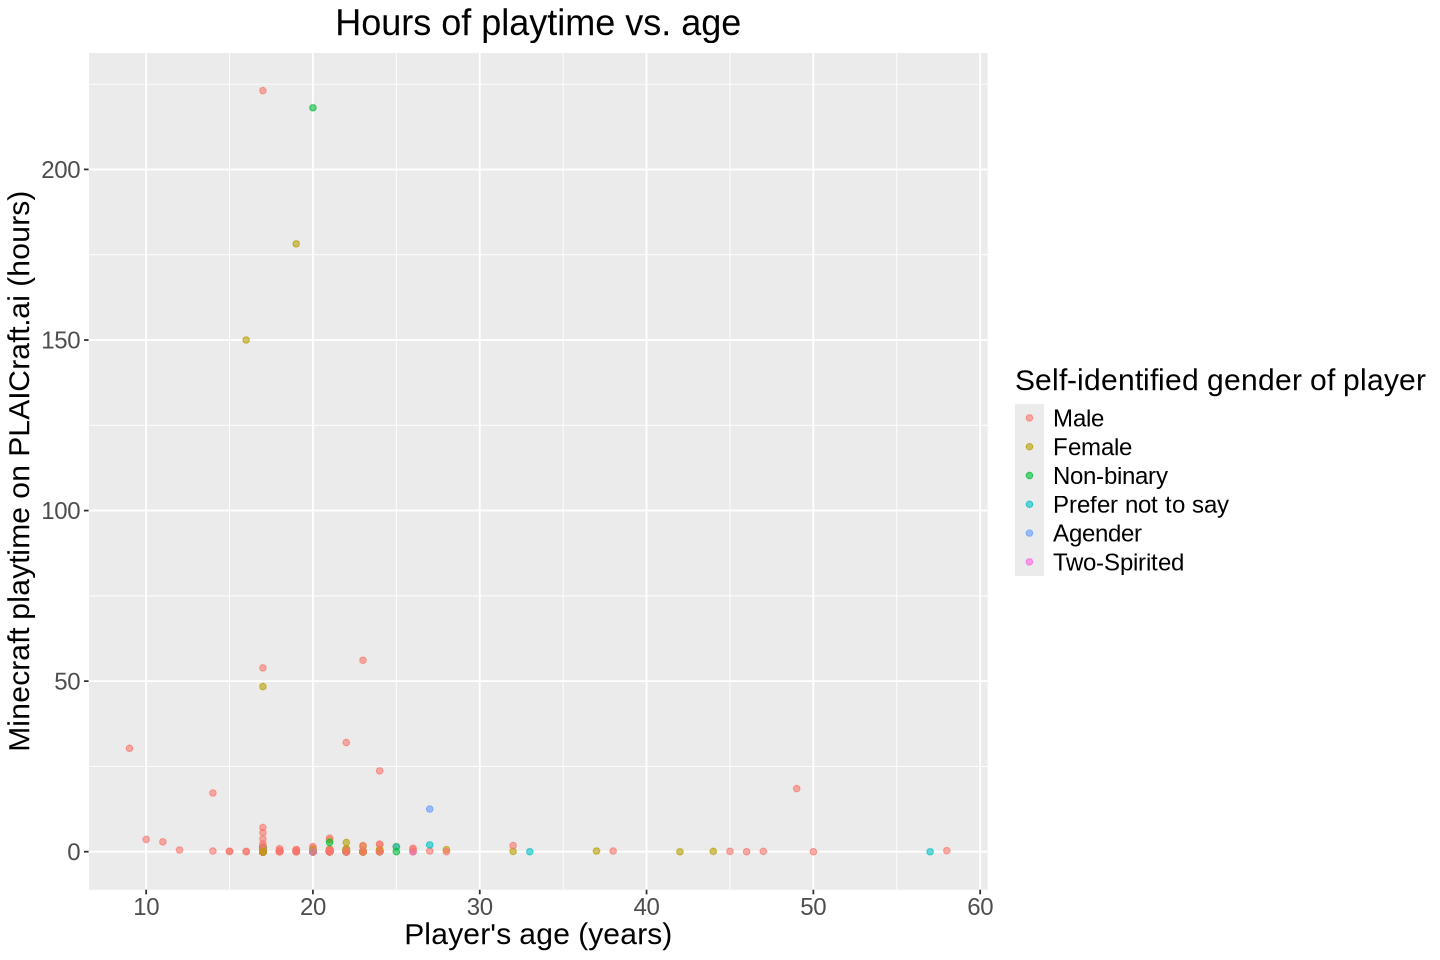

In [9]:
options(repr.plot.width = 12, repr.plot.height = 8)
hour_v_age <- na.omit(players) |> #There are 2 players with NA age
    ggplot(aes(x = Age, y = played_hours, colour = gender)) +
        geom_point(alpha = 0.6) +
        labs(x = "Player's age (years)", y = "Minecraft playtime on PLAICraft.ai (hours)",
             colour = "Self-identified gender of player", title = "Hours of playtime vs. age") +
        theme(text = element_text(size = 18), plot.title = element_text(hjust = 0.5)) +
        scale_fill_brewer(palette = "Dark2")
hour_v_age

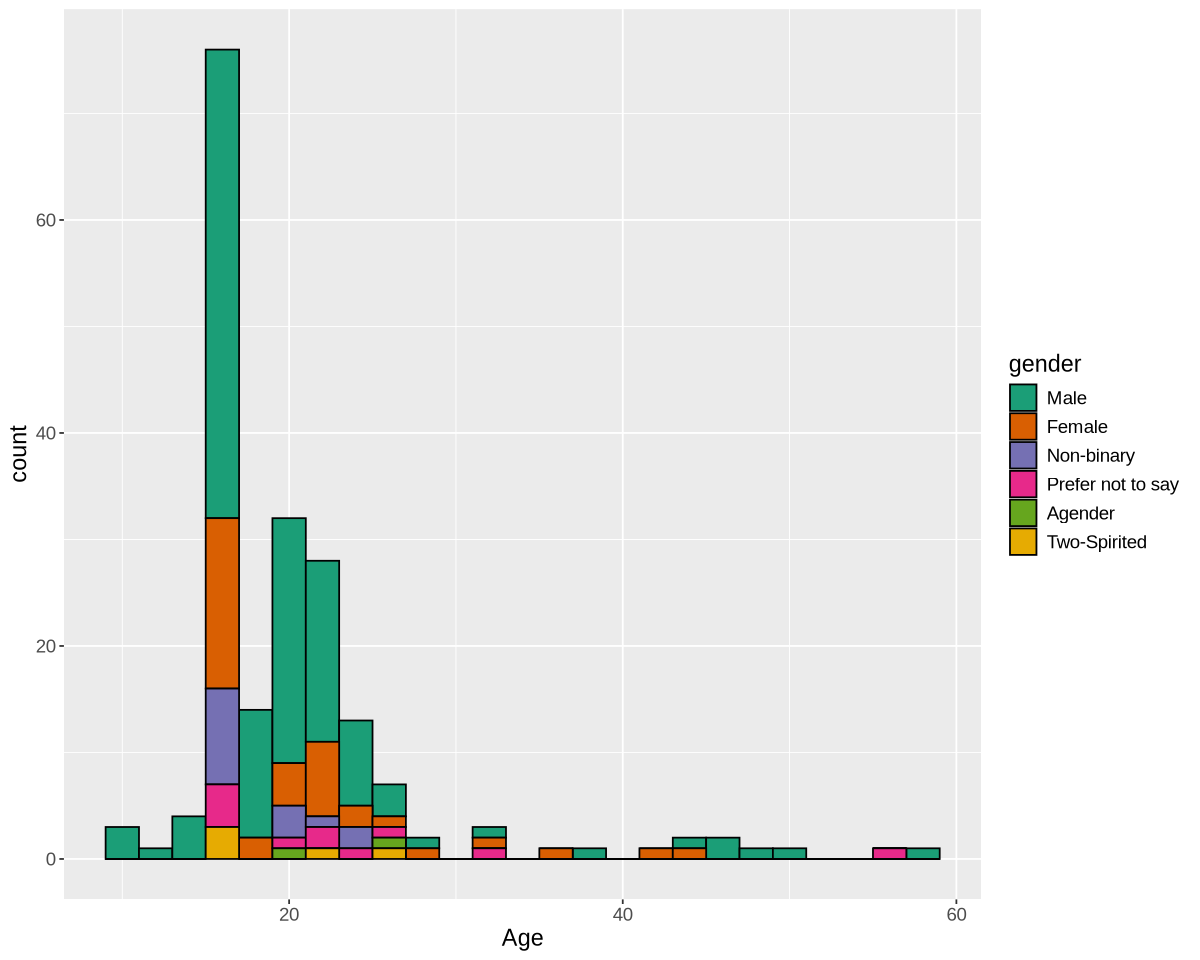

In [10]:
options(repr.plot.width = 10, repr.plot.height = 8)
player_age <- na.omit(players) |>
    ggplot(aes(Age, fill = gender)) +
        geom_histogram(binwidth = 2, colour = "black") +
        labs() +
        theme(text = element_text(size = 14), plot.title = element_text(hjust = 0.5)) +
        scale_fill_brewer(palette = "Dark2")
player_age